In [101]:
import os
import igraph
from igraph import Graph
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib

In [30]:
path='./data/wardchanges.edge'
c_path='./data/Nursing Station Dictionary.csv'

#read in edge file and save as dataframe
edgelist = []
with open(path) as f:
    lines = f.readlines()
    for line in lines:
        t, f, weight = line.split(' ', 2)
        weight = float(weight.split('}')[0].split(' ')[-1])
        edgelist.append([t, f, weight])
        
#convert names to numbers
df = pd.DataFrame(edgelist, columns=['to', 'from', 'weight'])

In [31]:
G=nx.from_pandas_edgelist(df, 'to', 'from', ['weight'])
G

In [61]:
true_count = 0
count = 0
for e1 in G['5EST']:
    for e2 in G['5EST']:
        if e1 == e2:
            continue
        truth = e2 in G[e1]
        
        if truth:
            true_count += 1
        count += 1

print(true_count/count)

0.8011695906432749


In [64]:
true_count/2

137.0

In [103]:
count/2

171.0

In [102]:
19*18/2

171.0

In [56]:
G['5EST']

AtlasView({'TICU': {'weight': 2.0}, 'BURN': {'weight': 11.0}, 'STPU': {'weight': 2.0}, '4ADU': {'weight': 11.0}, '5AD': {'weight': 4.0}, '6PST': {'weight': 3.0}, 'SICU': {'weight': 16.0}, '4ADN': {'weight': 2.0}, 'ISCU': {'weight': 6.0}, 'PACU': {'weight': 11.0}, '6EST': {'weight': 1.0}, 'MPCU': {'weight': 1.0}, '8BT': {'weight': 1.0}, '5BTA': {'weight': 6.0}, 'CTSU': {'weight': 2.0}, '5WST': {'weight': 4.0}, '6WH': {'weight': 2.0}, '6BT': {'weight': 1.0}, '3WST': {'weight': 1.0}})

In [50]:
nx.clustering(G)

{'TICU': 0.75,
 'ISCU': 0.7666666666666667,
 'PACU': 0.367948717948718,
 '5EST': 0.8011695906432749,
 'SICU': 0.6521739130434783,
 '8BT': 0.7355072463768116,
 'MICU': 0.7333333333333333,
 '5BTA': 0.7292307692307692,
 'CICC': 0.3333333333333333,
 '5AD': 0.7272727272727273,
 '4ADN': 0.8366013071895425,
 'STPU': 0.7233333333333334,
 'NSIU': 0.6133333333333333,
 'CICU': 0.677536231884058,
 '6WH': 0.6190476190476191,
 'CTSU': 0.7316017316017316,
 '6PST': 0.8416666666666667,
 'PCCL': 1.0,
 'CATH': 0.5333333333333333,
 'EPED': 1.0,
 'EACU': 0.358974358974359,
 'EDH': 0.9,
 'EWR': 0.6190476190476191,
 '4ONC': 0.6993464052287581,
 'MPCU': 0.7904761904761904,
 '3WH': 0.7777777777777778,
 '5ADS': 0.8676470588235294,
 '4LD': 0.48333333333333334,
 '6WST': 0.8888888888888888,
 '6BT': 0.780952380952381,
 '3WST': 0.6920289855072463,
 'BURN': 0.8974358974358975,
 '6EST': 0.7254901960784313,
 '5WST': 0.6492307692307693,
 'ICCU': 0.8138528138528138,
 'BMTU': 1.0,
 '4ADU': 0.7028985507246377,
 '5CH': 0.33

In [49]:
G['PACU']

AtlasView({'TICU': {'weight': 54.0}, 'PCCL': {'weight': 2.0}, 'EPED': {'weight': 3.0}, 'MICU': {'weight': 5.0}, '5ADS': {'weight': 1.0}, 'STPU': {'weight': 28.0}, '4ADU': {'weight': 57.0}, 'CICU': {'weight': 6.0}, '5AD': {'weight': 8.0}, '6PST': {'weight': 13.0}, '6EST': {'weight': 2.0}, 'SICU': {'weight': 37.0}, 'ACDO': {'weight': 2.0}, '3WH': {'weight': 4.0}, 'PRU': {'weight': 1.0}, '4ADN': {'weight': 16.0}, '6WST': {'weight': 2.0}, 'CATH': {'weight': 2.0}, '4LD': {'weight': 2.0}, 'ISCU': {'weight': 56.0}, 'BRON': {'weight': 1.0}, '5EST': {'weight': 11.0}, 'NSIU': {'weight': 48.0}, '5BTA': {'weight': 46.0}, '6WH': {'weight': 2.0}, 'EWR': {'weight': 5.0}, 'GIP': {'weight': 5.0}, 'CTSU': {'weight': 22.0}, 'BURN': {'weight': 5.0}, '4ONC': {'weight': 3.0}, 'MPCU': {'weight': 2.0}, 'SSU': {'weight': 6.0}, '8BT': {'weight': 13.0}, 'ICCU': {'weight': 26.0}, '5WST': {'weight': 3.0}, '6BT': {'weight': 10.0}, '3WST': {'weight': 11.0}, 'EACU': {'weight': 211.0}, 'CYST': {'weight': 1.0}, 'EDH': 

In [46]:
print(os.getcwd())

C:\Users\josep\python_files\CPTS_591\project


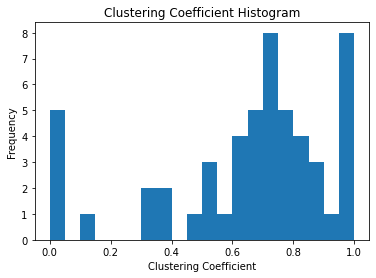

In [48]:
#plt.figure(figsize=(10,8))
plt.hist(nx.clustering(G).values(), bins = 20)
plt.ylabel('Frequency')
plt.xlabel('Clustering Coefficient')
plt.title('Clustering Coefficient Histogram')
plt.savefig(r'local_clustering.png')

In [22]:
# r = np.random.RandomState(seed=5)
# ints = r.random_integers(1, 10, size=(3,2))
# a = ['A', 'B', 'C']
# b = ['D', 'A', 'E']
# df = pd.DataFrame(ints, columns=['weight', 'cost'])
# df[0] = a
# df['b'] = b
# df

C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  


,weight,cost,0,b
0,4,7,A,D
1,7,1,B,A
2,10,9,C,E


In [3]:
df.head()

,to,from,weight
0,TICU,ISCU,11.0
1,TICU,PACU,6.0
2,TICU,5EST,2.0
3,TICU,SICU,6.0
4,TICU,8BT,2.0


In [104]:
#read in nursing station crosswalk
c_df = pd.read_csv(c_path)
c_df.columns = ['code', 'description', 'floor', 'floor_type']

In [5]:
#there are some places that don't show up in Nursing Station Dictionary
for code in ['STPU', '6PST', '5ADS', 'BURN', '4ADU']:
    c_df = c_df.append(pd.Series({'code':code, 'description':'no info', 'floor':'no info', 'floor_type':'no info'}), ignore_index=True)

In [6]:
c_df.head()

,code,description,floor,floor_type
0,1ADN,ONE ANDERSON,Observation,Observation/Admitting Unit
1,3AD,THREE ANDERSON,Floor,Cardiovascular
2,3NSH,THREE NEUROSCIENCES HOSPITAL,Floor,Psychiatric
3,3WH,THREE WOMEN'S,Floor,Peri-natal
4,3WST,THREE WEST,Floor,Medicine


In [7]:
#create dictionaries for floor and type, with code being key
floor_df = {code: floor for code, floor in zip(c_df['code'], c_df['floor'])}
type_df = {code: f_type for code, f_type in zip(c_df['code'], c_df['floor_type'])}

In [8]:
#convert data to graph
tuples = [tuple(x) for x in df.values]
g = igraph.Graph.TupleList(tuples, directed = True, edge_attrs = ['weight'])

In [100]:
np.mean(g.degree())

21.245283018867923

In [16]:
#create stats for network (taken from hw1)
def output_row(g, name):
    if g.is_directed() == True:
        g_type = 'directed'
        directed = True
    else:
        g_type = 'undirected'#directed or undirected
        directed = False
    n_nodes = g.vcount()
    n_links = g.ecount()
    n_cc = len(g.components().sizes()) #connected components #if directed - report number of strong and weak and connected components
    if g_type == 'directed':
        n_cc = len(g.components(mode='STRONG').sizes()), len(g.components(mode='WEAK').sizes())
    max_deg = max(g.degree())
    max_out_deg = max(g.degree(mode = 'out'))
    max_in_deg = max(g.degree(mode='in'))
    avg_path_length = g.average_path_length(directed = directed)
    diameter = g.diameter(directed = directed)
    cc_l = g.transitivity_undirected()#local clustering coeff (transitivity_undirected)
    cc_g = g.transitivity_avglocal_undirected()#global clustering coeff (transitivityavglocalundirected)
    
    
    return name, g_type, n_nodes, n_links, n_cc, max_deg, max_out_deg, max_in_deg, avg_path_length, diameter, cc_l, cc_g

row = output_row(g, 'hospital')
row

('hospital',
 'directed',
 53,
 563,
 (6, 1),
 68,
 30,
 38,
 2.4028716216216215,
 8,
 0.6800291545189504,
 0.7058599540252659)

# Graph with vertex colors for floor

In [69]:
#function to return hex color from spectrum given real number from [0,1]
def get_color(score, cmap="Blues"):
    cmap = matplotlib.cm.get_cmap(cmap)
    color = matplotlib.colors.rgb2hex(cmap(score))
    return color

In [70]:

#need floor_df

def get_visual_style(my_layout, output_file="graph.png"):
    #map_d is list of scores, color_list is list of color, category_list
    visual_style = {}

    # Set bbox and margin
    visual_style["bbox"] = (1000,1000)
    visual_style["margin"] = 20    

    # Set vertex size
    visual_style["vertex_size"] = 10

    # Set vertex lable size
    visual_style["vertex_label_size"] = 10
    visual_style["edge_curved"] = .1
    #visual_style["edge_curved"] = False
    visual_style["vertex_label"] = g.vs["name"]
    visual_style["edge_arrow_size"] = .5
    visual_style["vertex_label_dist"] = 2
    visual_style["edge_color"] = 'grey'
    # Set the layout

    visual_style["layout"] = my_layout

    # Plot the graph
    return visual_style


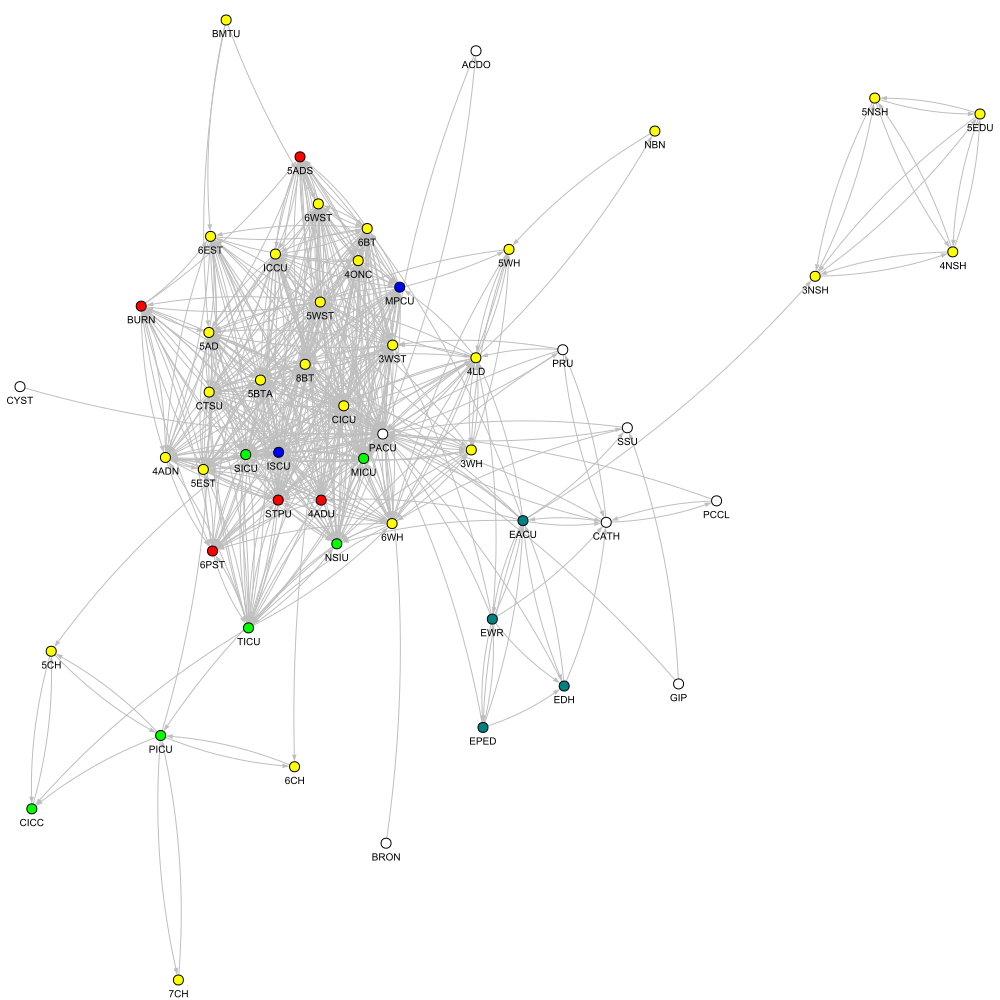

In [79]:
floors = list(set(c_df.floor))
floor_colors = ['#FFFF00', '#FFFFFF', '#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#808000', '#008080']
my_layout = g.layout_lgl()



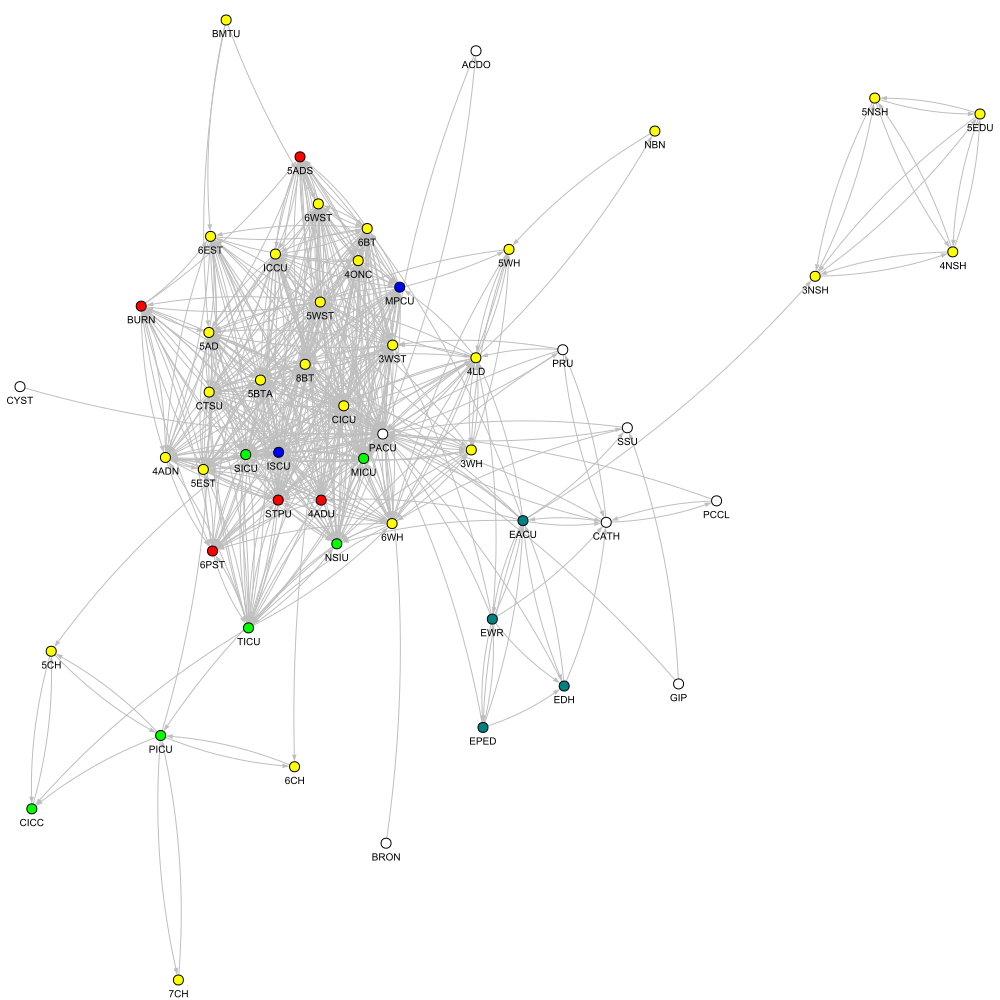

In [85]:
visual_style = get_visual_style(my_layout)
visual_style["vertex_color"] = [floor_colors[floors.index(floor_df[k])] for k in g.vs["name"]]
igraph.plot(g, 'floors2.png', **visual_style)
igraph.plot(g, **visual_style)

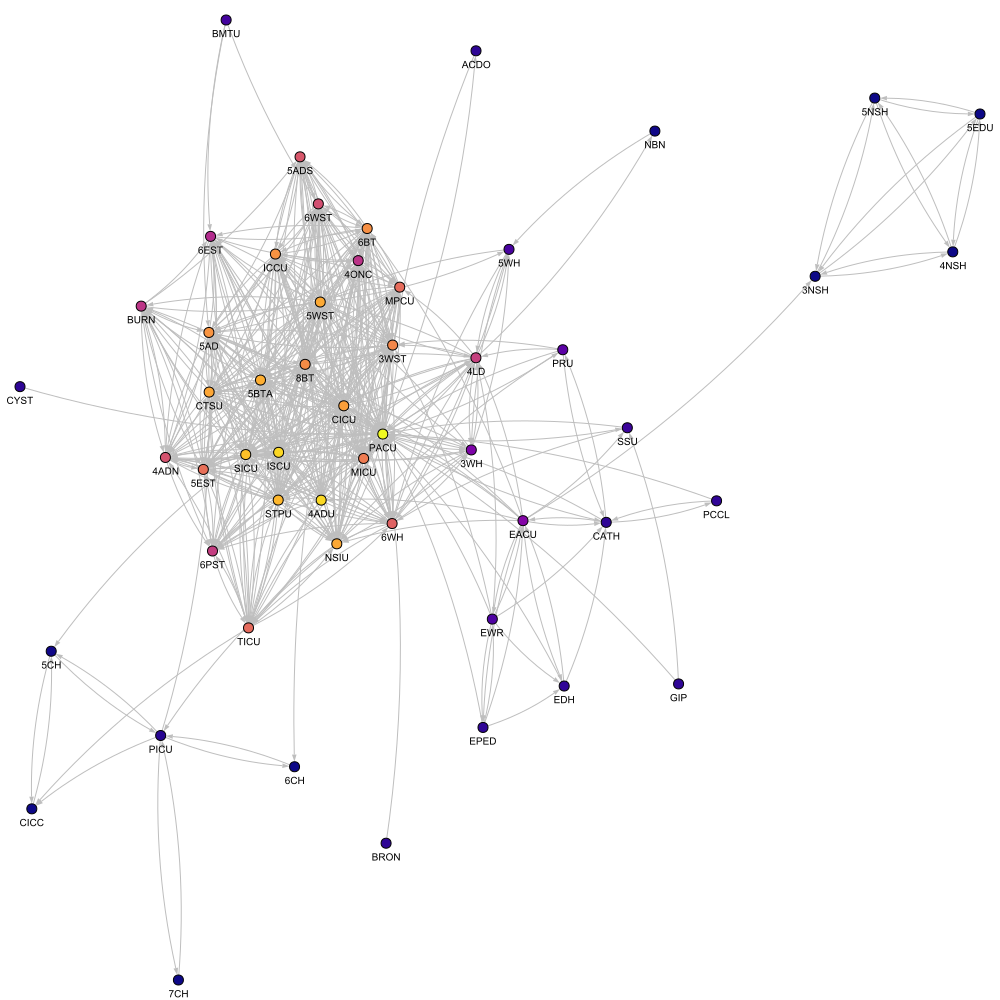

In [86]:
vertex_names = g.vs['name']
hub_scores = pd.DataFrame([[name, score] for name, score in zip(vertex_names, g.hub_score())], columns=['code', 'hub score'])

visual_style = get_visual_style(my_layout)
visual_style["vertex_color"] = [get_color(score, 'plasma') for score in hub_scores['hub score']]
igraph.plot(g, 'hubs2.png', **visual_style)
igraph.plot(g, **visual_style)

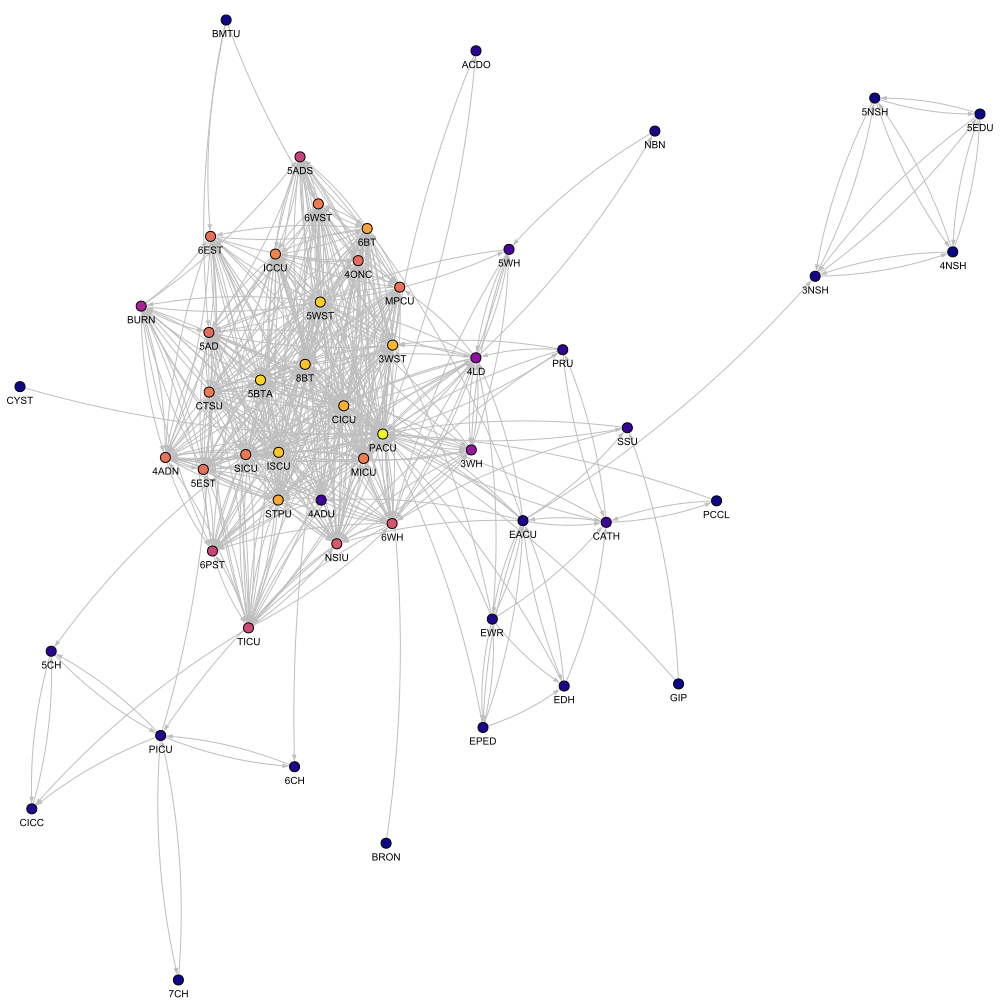

In [81]:
auth_scores = pd.DataFrame([[name, score] for name, score in zip(vertex_names, g.authority_score())], columns=['code', 'authority score'])

visual_style = get_visual_style(my_layout)
visual_style["vertex_color"] = [get_color(score, 'plasma') for score in auth_scores['authority score']]
#igraph.plot(g, 'auth.png', **visual_style)
igraph.plot(g, **visual_style)

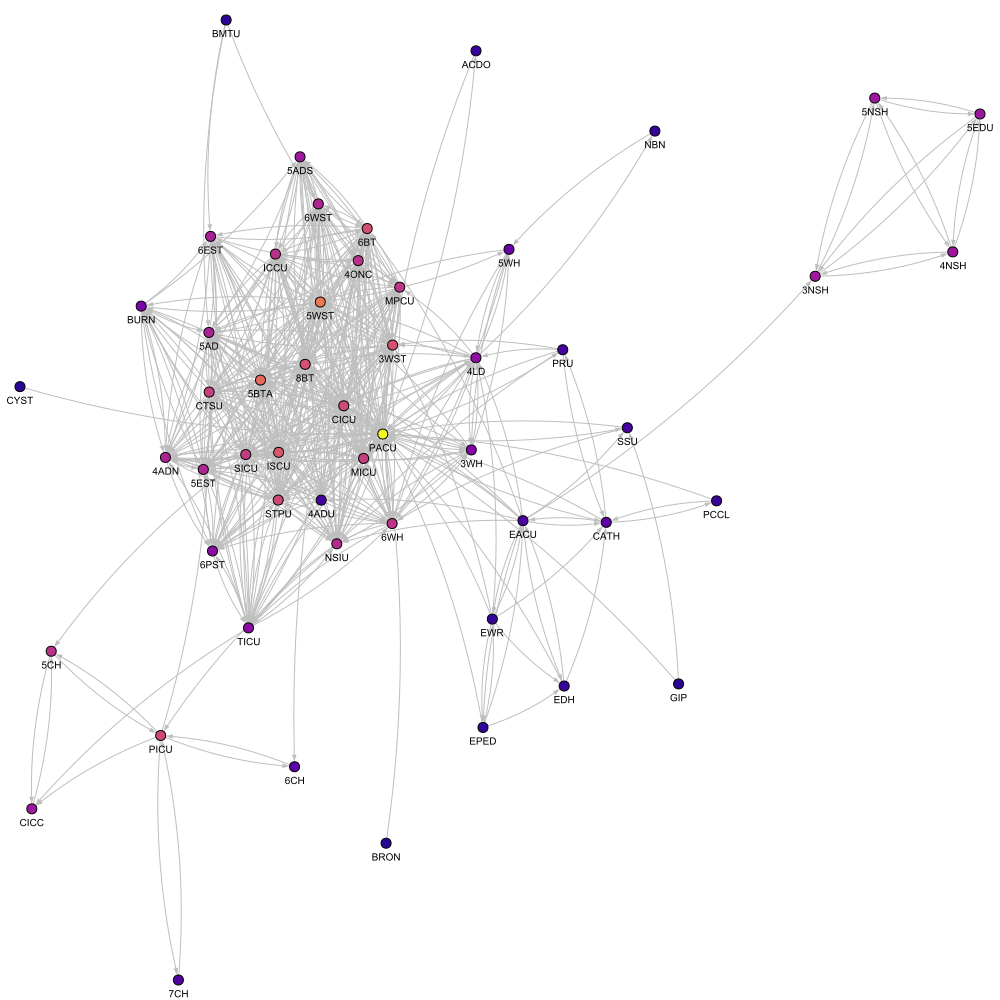

In [82]:
scores = pd.DataFrame([[name, score] for name, score in zip(vertex_names, g.pagerank(directed=True))], columns=['code', 'score'])['score']
scores = scores/np.max(scores)

visual_style = get_visual_style(my_layout)
visual_style["vertex_color"] = [get_color(score, 'plasma') for score in scores]
#igraph.plot(g, 'pagerank.png', **visual_style)
igraph.plot(g, **visual_style)

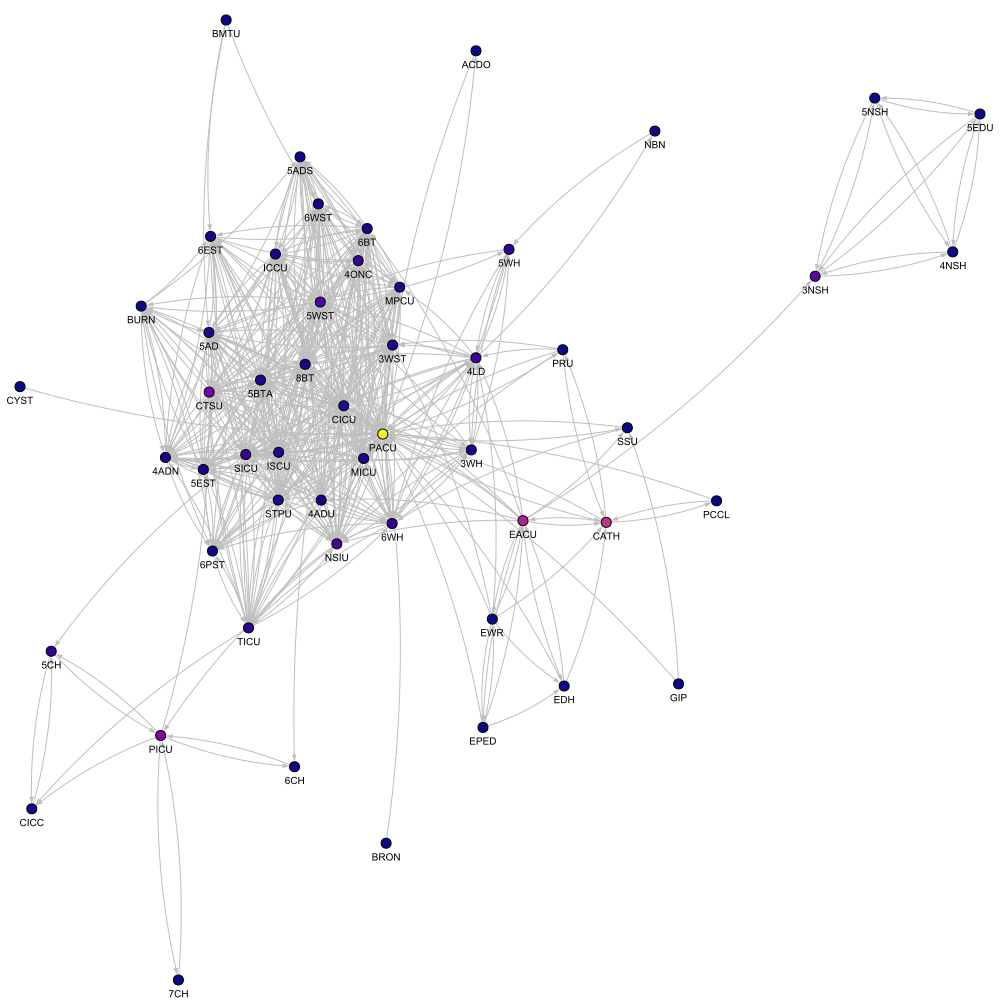

In [83]:
scores = pd.DataFrame([[name, score] for name, score in zip(vertex_names, g.betweenness())], columns=['code', 'score'])['score']
scores = scores/np.max(scores)

visual_style = get_visual_style(my_layout)
visual_style["vertex_color"] = [get_color(score, 'plasma') for score in scores]
#igraph.plot(g, 'bet.png', **visual_style)
igraph.plot(g, **visual_style)

# Clustering

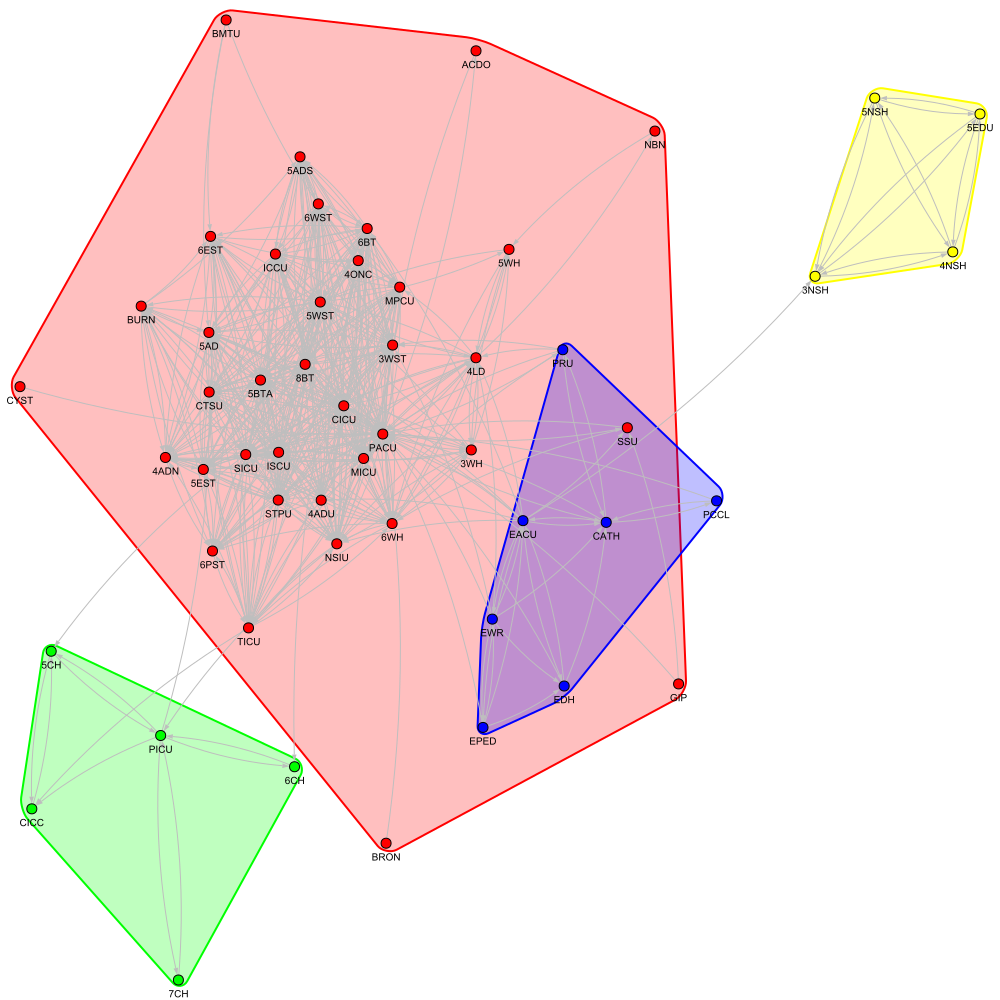

In [87]:
cl = g.community_infomap()

visual_style = get_visual_style(my_layout)
visual_style["vertex_label_dist"] = 2
# igraph.plot(cl, 'cluster.png', **visual_style)
igraph.plot(cl, 'cluster2.png', mark_groups = True, **visual_style)
igraph.plot(cl, mark_groups = True, **visual_style)

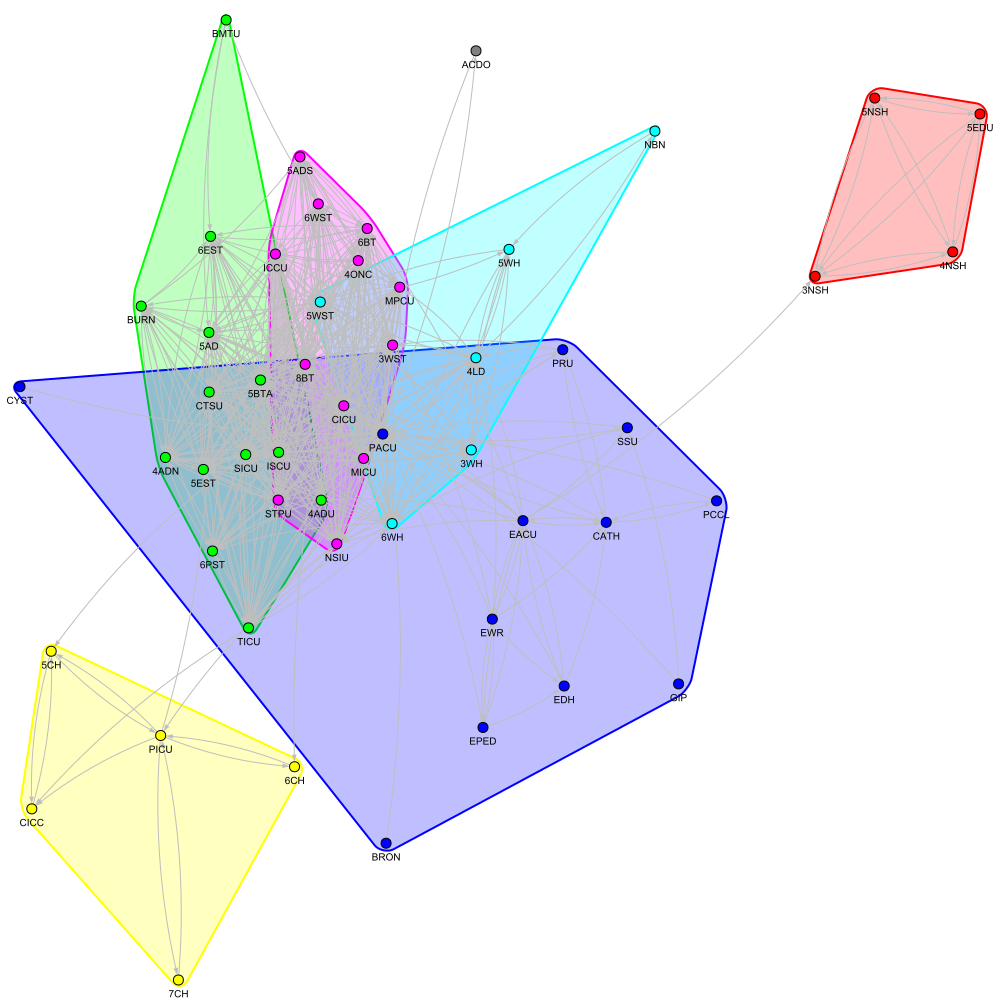

In [89]:
cl = g.community_spinglass()

visual_style = get_visual_style(my_layout)
visual_style["vertex_label_dist"] = 2
igraph.plot(cl, mark_groups = True, **visual_style)

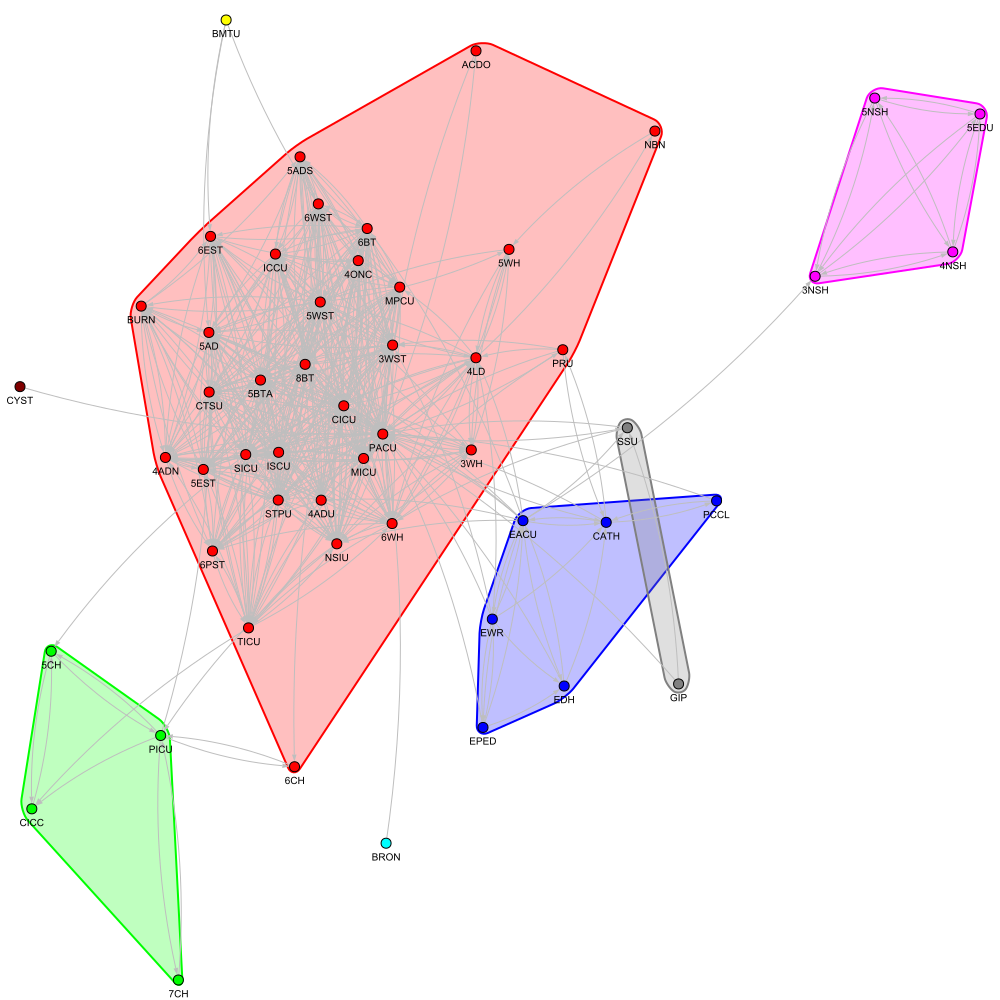

In [106]:
cl = g.community_label_propagation()

visual_style = get_visual_style(my_layout)
visual_style["vertex_label_dist"] = 2
igraph.plot(cl, mark_groups = True, **visual_style)
igraph.plot(cl, 'cluster_label2.png', mark_groups = True, **visual_style)

# Get all centrality scores

In [66]:
vertex_names = g.vs['name']
cent_df = pd.DataFrame([[name, score] for name, score in zip(vertex_names, g.hub_score())], columns=['code', 'hub score'])
cent_df['authority score'] = g.authority_score()
cent_df['closeness'] = g.closeness()
cent_df['betweenness'] = g.betweenness()
cent_df['pagerank'] = g.pagerank(directed=True)

In [17]:
c_df.head()

,code,description,floor,floor_type
0,1ADN,ONE ANDERSON,Observation,Observation/Admitting Unit
1,3AD,THREE ANDERSON,Floor,Cardiovascular
2,3NSH,THREE NEUROSCIENCES HOSPITAL,Floor,Psychiatric
3,3WH,THREE WOMEN'S,Floor,Peri-natal
4,3WST,THREE WEST,Floor,Medicine


In [109]:
floor_dict = {k:v for k,v in zip(c_df.code, c_df.floor)}
ft_dict = {k:v for k,v in zip(c_df.code, c_df.floor_type)}

In [110]:
cent_df['floor'] = cent_df['code'].replace(floor_dict)
cent_df['floor_type'] = cent_df['code'].replace(ft_dict)

In [111]:
cent_df.to_csv(r'output.csv', index=False)

In [113]:
cent_df.groupby('floor_type').mean().to_csv(r'floor_type_nums.csv')

In [35]:
results = cent_df.groupby('floor_type').mean()
results.sort_values('authority score', ascending=False)
results.to_csv(r'centrality.csv')

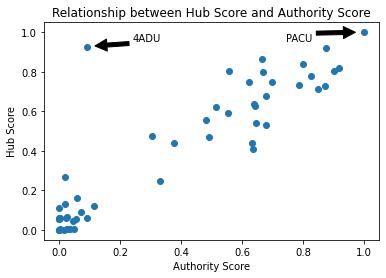

In [68]:
#plt.figure(figsize=(10,8))
plt.scatter(x=cent_df['authority score'], y=cent_df['hub score'])
plt.xlabel('Authority Score')
plt.ylabel('Hub Score')
plt.title('Relationship between Hub Score and Authority Score')
plt.annotate('PACU',
    xy=(.98, 1), xycoords='data',
    xytext=(.8, 0.95), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='right', verticalalignment='top')
plt.annotate('4ADU',
    xy=(.11, .93), xycoords='data',
    xytext=(.35, .95), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='right', verticalalignment='top')
plt.savefig('hub_auth2.png')

In [27]:
cent_df.sort_values('hub score', ascending=False).iloc[:3]

,code,hub score,authority score,closeness,betweenness,pagerank
2,PACU,1.000000,1.000000,0.764706,920.890481,0.058701
36,4ADU,0.923760,0.091847,0.604651,7.634722,0.006165
1,ISCU,0.918801,0.875874,0.584270,29.599651,0.032652


In [28]:
# cent_df.to_csv(r'scores.csv', index=False)
# cent_df[['code', 'hub score']].sort_values('hub score', ascending=False)[:5].to_csv(r'top_hub_scores.csv', index=False)
# cent_df[['code', 'authority score']].sort_values('authority score', ascending=False)[:5].to_csv(r'top_auth_scores.csv', index=False)
# cent_df[['code', 'closeness']].sort_values('closeness', ascending=False)[:5].to_csv(r'top_closeness_scores.csv', index=False)
# cent_df[['code', 'betweenness']].sort_values('betweenness', ascending=False)[:5].to_csv(r'top_betweenness_scores.csv', index=False)
# cent_df[['code', 'pagerank']].sort_values('pagerank', ascending=False)[:5].to_csv(r'top_pagerank_scores.csv', index=False)